In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv()
plt.scatter(data['经度'],data['纬度'],  # 按照经纬度显示
            s = data['房屋单价']/500,  
            c = data['参考总价'],  
            alpha = 0.4, cmap = 'Reds')  
plt.grid()
print(data.dtypes)

In [ ]:
def d_range(df,*cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.appendp(krange)
    return(krange)

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))b

In [ ]:
data[key2].hist(bins=10)#查看分组数据，确定组数

In [ ]:
gcut = pd.cut(data[key2],10,right=False)
gcut_count = gcut.value_counts(sort=False)  # 不排序
data['%s分组区间' % key2] = gcut.values
print(gcut.head(),'\n------')
print(gcut_count)
data.head()

In [ ]:
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns ={gcut_count.name:'频数'}, inplace = True)  # 修改频数字段名
r_zj['频率'] = r_zj / r_zj['频数'].sum()  # 计算频率
r_zj['累计频率'] = r_zj['频率'].cumsum()  # 计算累计频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_zj.style.bar(subset=['频率','累计频率'], color='green',width=100)

In [2]:
r_zj['频率'].plot(kind = 'bar',
                 width = 0.8,
                 figsize = (12,2),
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率直方图')
# 绘制直方图

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k, color = 'k')

NameError: name 'r_zj' is not defined

                A_sale      B_sale
2017-06-01  891.337639  427.911664
2017-06-02  704.862346  441.958910
2017-06-03  306.564158  554.273838
2017-06-04   33.695968    7.118601
2017-06-05  432.495895  615.820295


<AxesSubplot:title={'center':'AB产品销量对比-柱状图'}>

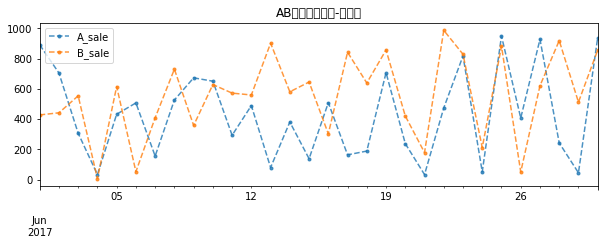

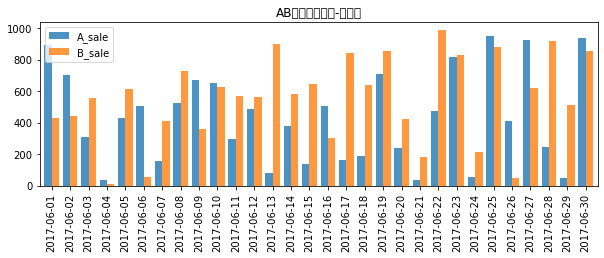

In [3]:
data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20170601','20170630'))
print(data.head())
# 创建数据 → 30天内A/B产品的日销售额

data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
       figsize = (10,3),
       title = 'AB产品销量对比-折线图')
# 折线图比较

data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
          figsize = (10,3),
          title = 'AB产品销量对比-柱状图')
# 多系列柱状图比较

[Text(0, 0, '2017-06-01'),
 Text(6, 0, '2017-06-07'),
 Text(12, 0, '2017-06-13'),
 Text(18, 0, '2017-06-19'),
 Text(24, 0, '2017-06-25')]

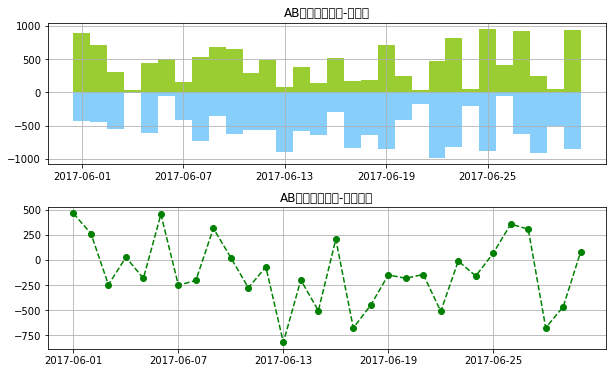

In [4]:
fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)
# 创建子图及间隔设置

ax1 = fig3.add_subplot(2,1,1)  
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor = 'yellowgreen')
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])
# 创建堆叠图

ax2 = fig3.add_subplot(2,1,2)  
y3 = data['A_sale']-data['B_sale']
plt.plot(x,y3,'--go')

plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])
# 创建差值折线图

In [5]:
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())

                A_sale      B_sale
2017-06-01  406.029602   49.270420
2017-06-02   61.275070   30.668468
2017-06-03   61.667761  187.228650
2017-06-04  931.889414  181.745688
2017-06-05  852.757047  183.441248


                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01  406.029602   49.270420  0.029293  0.013652  2.93%  1.37%
2017-06-02   61.275070   30.668468  0.004421  0.008498  0.44%  0.85%
2017-06-03   61.667761  187.228650  0.004449  0.051879  0.44%  5.19%
2017-06-04  931.889414  181.745688  0.067231  0.050360  6.72%  5.04%
2017-06-05  852.757047  183.441248  0.061522  0.050829  6.15%  5.08%


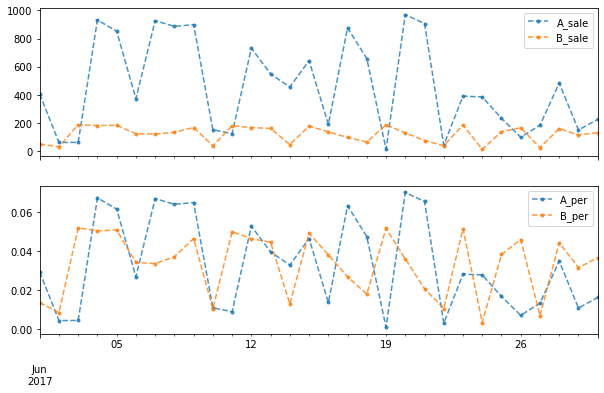

In [6]:
data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
# 计算出每天的营收占比

data['A_per%'] = data['A_per'].apply(lambda x: '%.2f%%' % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x: '%.2f%%' % (x*100))
# 转换为百分数
print(data.head())

fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')

         consumption       salary
2017-01  2455.109178  5071.765234
2017-02  2630.265036  5194.978449
2017-03  2291.097990  5209.685379
2017-04  2833.594624  5008.536563
2017-05  2600.037919  5017.498467
         consumption       salary       c_s
2017-01  2455.109178  5071.765234  0.484074
2017-02  2630.265036  5194.978449  0.506309
2017-03  2291.097990  5209.685379  0.439777
2017-04  2833.594624  5008.536563  0.565753
2017-05  2600.037919  5017.498467  0.518194


<AxesSubplot:>

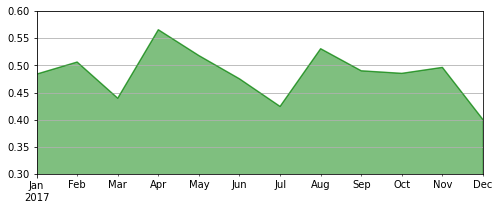

In [7]:
data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
data['c_s'] = data['consumption'] / data['salary']
print(data.head())
data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)

                      A            B            C           D
2017-06-01  3156.420870  1041.924387  2625.128549  505.267991
2017-06-02  2724.505843  1140.146559  7899.459887  687.542608
2017-06-03  4538.395976  1642.705904  8825.905862  119.502447
2017-06-04  4207.049770  1071.967024   130.170048   14.434028
2017-06-05  4137.534531  1905.020188  3157.680601   66.641071


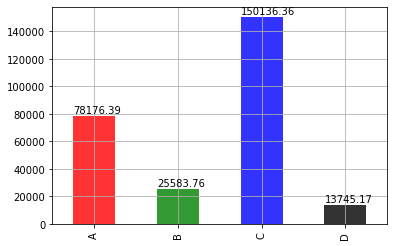

In [8]:
data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
data.sum().plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')

                      A
2017-06-01  2820.764463
2017-06-02  1412.332374
2017-06-03  2229.890814
2017-06-04  1322.101973
2017-06-05  1276.366317
------


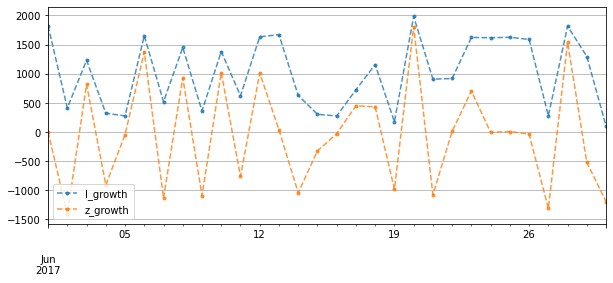

In [9]:
data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据 → 30天内A产品的销售情况

data['base'] = 1000  # 假设基期销售额为1000，后面每一天都为计算期
data['l_growth'] = data['A'] - data['base']  # 累计增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平
data[data.isnull()] = 0  # 替换缺失值

data[['l_growth','z_growth']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  

plt.legend(loc = 'lower left')
plt.grid()

                      A  base     l_growth     z_growth    lspeed    zspeed
2017-06-01  2820.764463  1000  1820.764463     0.000000  1.820764       NaN
2017-06-02  1412.332374  1000   412.332374 -1408.432089  0.412332 -0.499309
2017-06-03  2229.890814  1000  1229.890814   817.558441  1.229891  0.578871
2017-06-04  1322.101973  1000   322.101973  -907.788841  0.322102 -0.407100
2017-06-05  1276.366317  1000   276.366317   -45.735656  0.276366 -0.034593


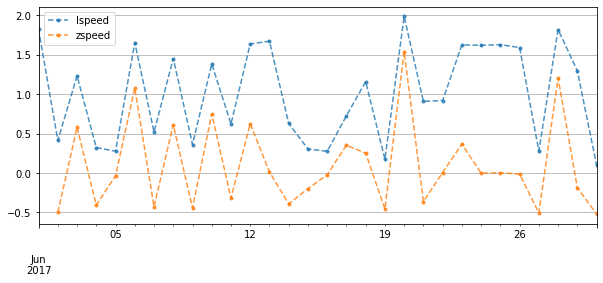

In [10]:
data['lspeed'] = data['l_growth'] / data['base']  # 定基增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']  # 环比增长速度
data[['lspeed','zspeed']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  

plt.grid()
print(data.head())

In [11]:
data = pd.DataFrame({'value':np.random.randint(100,120,100),
                    'f':np.random.rand(100)})
data['f'] = data['f'] / data['f'].sum()  # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('------')
# 创建数据

mean = data['value'].mean()
print('简单算数平均值为：%.2f' % mean)

   value         f
0    107  0.014884
1    117  0.011127
2    109  0.018691
3    107  0.016848
4    103  0.003319
------
简单算数平均值为：109.43


In [12]:
m = data['value'].mode()
print('众数为',m.tolist())

众数为 [107, 111, 116]


<AxesSubplot:ylabel='Density'>

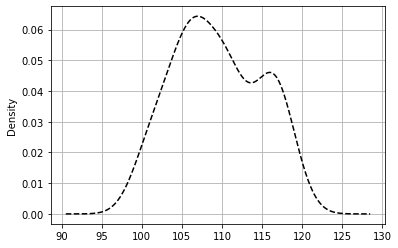

In [13]:
data['value'].plot(kind = 'kde',style = '--k',grid = True)

In [14]:
#离中趋势度量
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())

                A_sale      B_sale
2017-06-01  416.542460  844.107163
2017-06-02  355.243863  278.981164
2017-06-03  799.368951  969.007065
2017-06-04  708.597667  938.649037
2017-06-05  723.599956   31.388793


A销售额的分位差为：424.97, B销售额的分位差为：559.97
------


<AxesSubplot:>

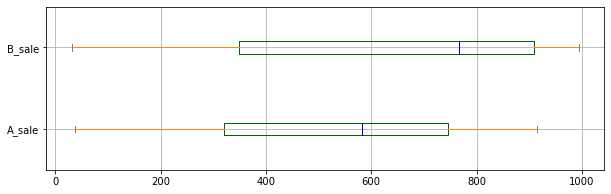

In [16]:
sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f, B销售额的分位差为：%.2f' % (a_iqr,b_iqr))
print('------')
# 分位差

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid = True,color = color,figsize = (10,3))

A    3023.096376
B    3517.223919
C    2246.923578
D    3307.663191
E    2745.340327
F    4112.284436
G    3070.553998
H    1479.344126
I    3742.138051
J    4606.920651
dtype: float64
------
超过80%累计占比的节点值索引为： E
超过80%累计占比的节点值索引位置为： 7
------
核心产品为：
J    4606.920651
F    4112.284436
I    3742.138051
B    3517.223919
D    3307.663191
G    3070.553998
A    3023.096376
E    2745.340327
dtype: float64


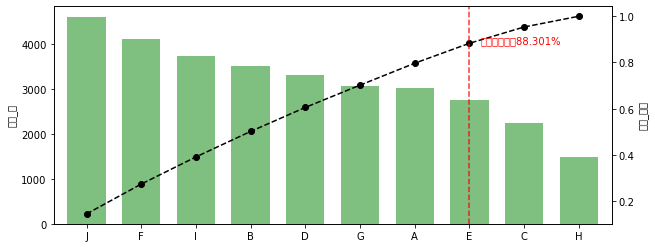

In [17]:
# 帕累托分布分析 

data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------')
# 创建数据，10个品类产品的销售额

data.sort_values(ascending=False, inplace= True)
# 由大到小排列

plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('营收_元')
# 创建营收柱状图

p = data.cumsum()/data.sum()  # 创建累计占比，Series
key = p[p>0.8].index[0]  
key_num = data.index.tolist().index(key) 
print('超过80%累计占比的节点值索引为：' ,key)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------')
# 找到累计占比超过80%时候的index
# 找到key所对应的索引位置

p.plot(style = '--ko', secondary_y=True)  # secondary_y → y副坐标轴
plt.axvline(key_num,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'累计占比为：%.3f%%' % (p[key]*100), color = 'r')  # 累计占比超过80%的节点
plt.ylabel('营收_比例')
# 绘制营收累计占比曲线

key_product = data.loc[:key]
print('核心产品为：')
print(key_product)
# 输出决定性因素产品

       value
0   9.387394
1   9.216072
2  10.255231
3   9.721985
4  11.204848


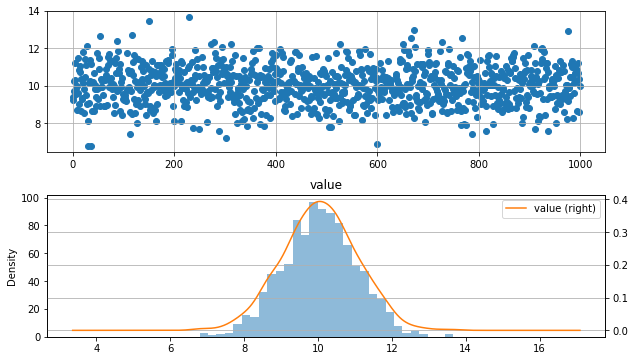

In [18]:
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(2,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

       value
0   8.883490
1   9.821422
2  10.666206
3   9.425759
4   9.272613
均值为：9.99，标准差为：1.04
------
   index     value       p         q
0     91  6.916276 -0.0005 -2.964870
1    301  6.983423  0.0005 -2.900068
2    864  7.035632  0.0015 -2.849682
3    100  7.048307  0.0025 -2.837450
4    574  7.109783  0.0035 -2.778121
------
四分之一位数为：9.29，四分之三位数为：10.71
------


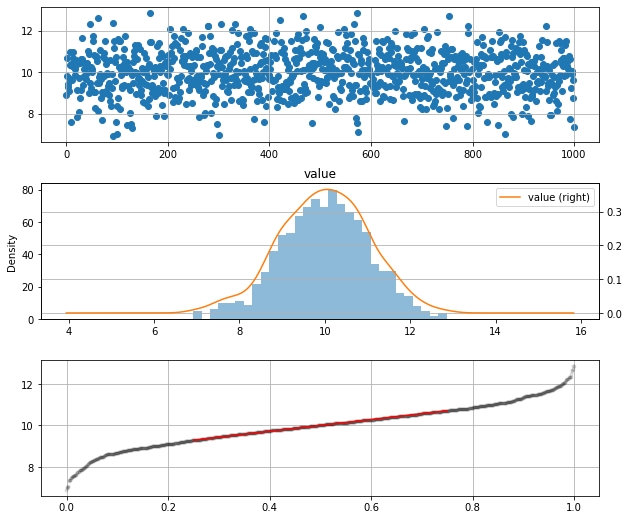

In [19]:
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')
#  计算均值，标准差

s.sort_values(by = 'value', inplace = True)  # 重新排序
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
s_r['p'] = (s_r.index - 0.5) / len(s_r)  
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('------')
# 计算百分位数 p(i)
# 计算q值

st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('------')
# 计算四分之一位数、四分之三位数

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()

样本均值为：79.74，样本标准差为：5.94
------
实际观测D值为：0.1597


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


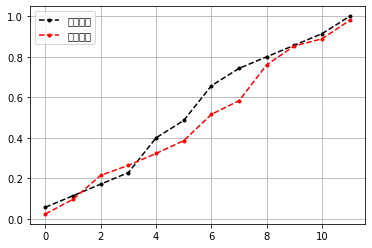

In [20]:
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()
std = df['value'].std()
print("样本均值为：%.2f，样本标准差为：%.2f" % (u,std))
print('------')
# 查看数据基本统计量

s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
# 创建频率数据

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max()
print("实际观测D值为：%.4f" % dmax)
# D值序列计算结果表格

df_s['累计频率'].plot(style = '--k.')
df_s['理论分布'].plot(style = '--r.')
plt.legend(loc = 'upper left')
plt.grid()
# 密度图表示

df_s

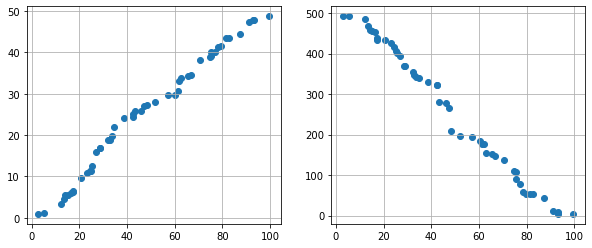

In [21]:
data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)
# 创建三个数据：data1为0-100的随机数并从小到大排列，data2为0-50的随机数并从小到大排列，data3为0-500的随机数并从大到小排列，

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1, data2)
plt.grid()
# 正线性相关

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1, data3)
plt.grid()
# 负线性相关

In [25]:
data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
# 创建样本数据

u1,u2 = data['value1'].mean(),data['value2'].mean()  # 计算均值
std1,std2 = data['value1'].std(),data['value2'].std()  # 计算标准差
#print('value1正态性检验：\n',stats.kstest(data['value1'], 'norm', (u1, std1)))
#print('value2正态性检验：\n',stats.kstest(data['value2'], 'norm', (u2, std2)))
# 正态性检验 → pvalue >0.05

data['(x-u1)*(y-u2)'] = (data['value1'] - u1) * (data['value2'] - u2)
data['(x-u1)**2'] = (data['value1'] - u1)**2
data['(y-u2)**2'] = (data['value2'] - u2)**2
print(data.head())
print('------')
# 制作Pearson相关系数求值表
r = data['(x-u1)*(y-u2)'].sum() / (np.sqrt(data['(x-u1)**2'].sum() * data['(y-u2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)

     value1    value2
0  0.014454  0.112866
1  4.180007  0.159964
2  4.671932  0.272324
3  5.555012  0.308328
4  6.815312  0.541088
     value1    value2  (x-u1)*(y-u2)    (x-u1)**2   (y-u2)**2
0  0.014454  0.112866    1379.609608  2841.738294  669.774087
1  4.180007  0.159964    1269.490598  2414.975953  667.338479
2  4.671932  0.272324    1251.316378  2366.869164  661.545937
3  5.555012  0.308328    1226.883259  2281.724422  659.695149
4  6.815312  0.541088    1183.688068  2162.910269  647.792682
------
Pearson相关系数为：0.9979


In [26]:
data.corr()

,value1,value2,(x-u1)*(y-u2),(x-u1)**2,(y-u2)**2
value1,1.000000,0.997922,-0.240842,-0.270889,-0.209844
value2,0.997922,1.000000,-0.206688,-0.236312,-0.176258
(x-u1)*(y-u2),-0.240842,-0.206688,1.000000,0.997807,0.997728
(x-u1)**2,-0.270889,-0.236312,0.997807,1.000000,0.991106
(y-u2)**2,-0.209844,-0.176258,0.997728,0.991106,1.000000


In [28]:
data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1,len(data)+1)
print(data)
print('------')
# “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2
print(data)
print('------')
# 求出di，di2

n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n**2 - 1))
print('相关系数为：%.4f' % rs)

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
    智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
6   97        20       2       6
2  100        27       4       7
4   99        28       3       8
5  103        29       6       9
3  101        50       5      10
------
    智商  每周看电视小时数  range1  range2  d  d2
1   86         0       1       1  0   0
8  112         6       9       2  7  49
0  106         7       7       3  4  16
7  113        12      10       4  6  36
9  110        17       8       5  3   9
6   97        20       2       6 -4  16
2  100        27       4       7 -3   9
4   99        28       3       8 -5  25
5  103        29       6       9 -3   9
3  101        50       5      10 -5  25
---

In [29]:
data.corr(method='spearman')

,智商,每周看电视小时数,range1,range2,d,d2
智商,1.000000,-0.175758,1.000000,-0.175758,0.713428,0.518607
每周看电视小时数,-0.175758,1.000000,-0.175758,1.000000,-0.786600,0.024696
range1,1.000000,-0.175758,1.000000,-0.175758,0.713428,0.518607
range2,-0.175758,1.000000,-0.175758,1.000000,-0.786600,0.024696
d,0.713428,-0.786600,0.713428,-0.786600,1.000000,0.192561
d2,0.518607,0.024696,0.518607,0.024696,0.192561,1.000000


In [31]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [32]:
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

print(s.isnull())  # Series直接判断是否是缺失值，返回一个Series
print(df.notnull())  # Dataframe直接判断是否是缺失值，返回一个Series
print(df['value1'].notnull())  # 通过索引判断

s2 = s[s.isnull() == False]  
df2 = df[df['value2'].notnull()]    # 注意和 df2 = df[df['value2'].notnull()] ['value1'] 的区别
print(s2)
print(df2)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0     True    True
1     True    True
2     True    True
3     True    True
4    False    True
5    False   False
6     True   False
7     True    True
8    False    True
9     True   False
10    True    True
0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
7     54.0      f
8      NaN      g
10   190.0      g


In [34]:
s.dropna(inplace = True)
df2 = df['value2'].dropna()
print(s)
print(df2)

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
0     a
1     b
2     c
3     d
4     e
7     f
8     g
10    g
Name: value2, dtype: object


In [37]:
s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace = True)
print(s)

0        1
1        1
2        1
3        1
4        2
5        2
6        2
7        3
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object


In [39]:
s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace([1,2,3],np.nan,inplace = True)
print(s)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      4.0
9      5.0
10     NaN
11     NaN
12    66.0
13    54.0
14     NaN
15    99.0
dtype: float64


In [40]:
s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.fillna(method = 'ffill',inplace = True)
print(s)

0      1.0
1      1.0
2      1.0
3      1.0
4      2.0
5      2.0
6      2.0
7      3.0
8      4.0
9      5.0
10     5.0
11     5.0
12    66.0
13    54.0
14    54.0
15    99.0
dtype: float64


0    84.932729
1    91.446303
2    76.209799
3          NaN
4    78.728581
dtype: float64
总数据量:100
------
缺失值数据量:9
缺失数据占比:9.00%


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([-2, -1], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

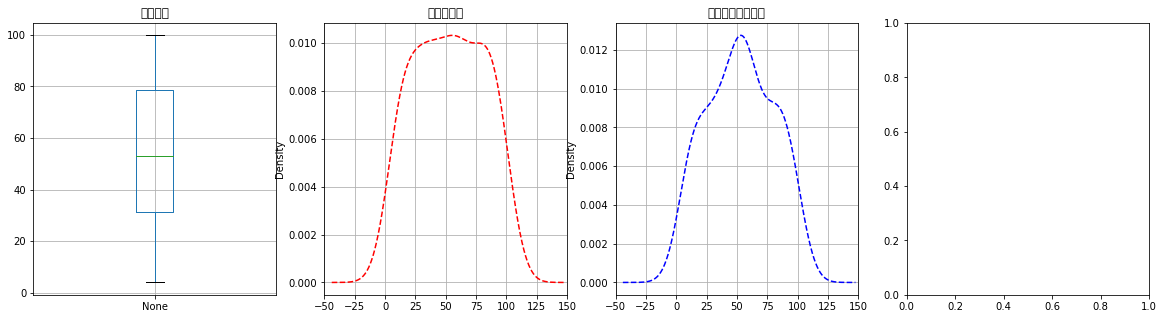

In [41]:
data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
print(data.head())
print('总数据量:%i' % len(data))
print('------')
# 创建数据

data_na = data[data.isnull()]
print('缺失值数据量:%i' % len(data_na))
print('缺失数据占比:%.2f%%' % (len(data_na) / len(data) * 100))
# 缺失值的数量

data_c = data.fillna(data.median())  #  中位数填充缺失值
fig,axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax = axes[0],grid = True,title = '数据分布')
data.plot(kind = 'kde',style = '--r',ax = axes[1],grid = True,title = '删除缺失值',xlim = [-50,150])
data_c.plot(kind = 'kde',style = '--b',ax = axes[2],grid = True,title = '缺失值填充中位数',xlim = [-50,150])
# 密度图查看缺失值情况

def na_c(s,n,k=5):
    y = s[list(range(n-k,n+1+k))] # 取数
    y = y[y.notnull()]  # 剔除空值
    return(lagrange(y.index,list(y))(n))
na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i)
        print(na_c(data,i))
        na_re.append(data[i])
data.dropna(inplace=True)  # 清除插值后仍存在的缺失值
data.plot(kind = 'kde',style = '--k',ax = axes[3],grid = True,title = '拉格朗日插值后',xlim = [-50,150])
print('finished!')

均值为：-1.707，标准差为：100.848
------
异常值共15条


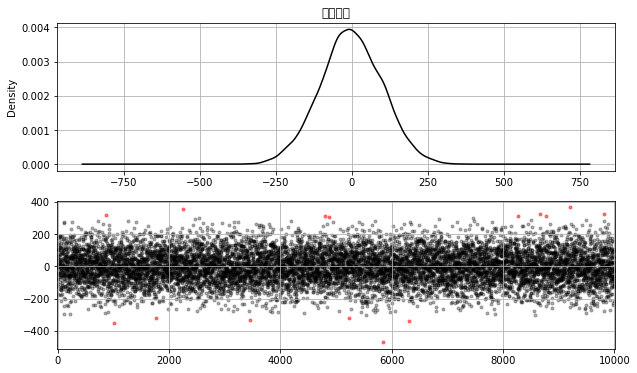

In [42]:
data = pd.Series(np.random.randn(10000)*100)
# 创建数据

u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std))
print('均值为：%.3f，标准差为：%.3f' % (u,std))
print('------')
# 正态性检验

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')

# 绘制数据密度曲线

ax2 = fig.add_subplot(2,1,2)
error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()

count    10000.000000
mean        -1.707173
std        100.848401
min       -469.099433
25%        -68.082689
50%         -2.646076
75%         67.367317
max        365.088258
dtype: float64
分位差为：135.450，下限为：-271.258，上限为：270.542
异常值共65条


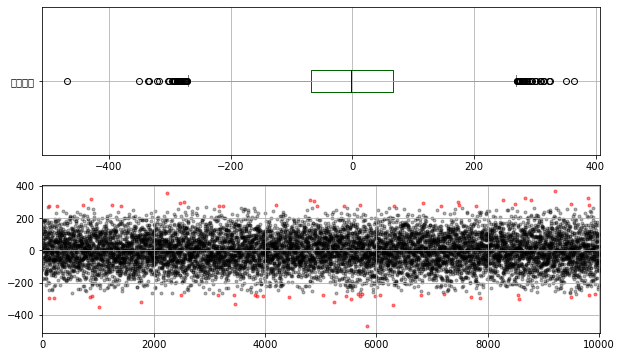

In [43]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')

s = data.describe()
print(s)

q1 = s['25%']
q3 = s['75%']
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为：%.3f，下限为：%.3f，上限为：%.3f' % (iqr,mi,ma))

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) & (data <= ma)]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c

plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()

In [44]:
df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())

def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)

df_n = data_norm(df,'value1','value2')
print(df_n.head())

     value1     value2
0  7.060246   3.944791
1  4.445077  69.777647
2  1.383312   7.405345
3  0.388353  55.945849
4  8.015681  33.271828
------
     value1     value2  value1_n  value2_n
0  7.060246   3.944791  0.374801  0.013309
1  4.445077  69.777647  0.227891  1.000000
2  1.383312   7.405345  0.055893  0.065176
3  0.388353  55.945849  0.000000  0.792692
4  8.015681  33.271828  0.428474  0.452858


In [45]:
df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())

def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)

      value1     value2
0  88.715924  78.945825
1  53.408688  11.054393
2  15.549817  94.149193
3  71.856008  39.968380
4   9.571668   1.466702
------
      value1     value2  value1_Zn  value2_Zn
0  88.715924  78.945825   1.157646   0.599679
1  53.408688  11.054393   0.166957  -1.427798
2  15.549817  94.149193  -0.895330   1.053705
3  71.856008  39.968380   0.684572  -0.564325
4   9.571668   1.466702  -1.063071  -1.714120
5  72.669676  94.431589   0.707403   1.062138
6  94.446530  45.930107   1.318442  -0.386287
7   5.313298  75.305240  -1.182557   0.490958
8   3.980948  87.175385  -1.219942   0.845442
9  59.072574  60.224985   0.325880   0.040609


,value1,value2,value1_n,value2_n,f
D,29.319034,71.567571,1.000000,0.785139,0.914056
F,23.905000,44.132165,0.813237,0.460883,0.672295
J,12.074726,89.746964,0.405138,1.000000,0.643083
G,29.033025,13.547670,0.990134,0.099408,0.633843
A,11.521871,69.680087,0.386067,0.762831,0.536773
H,19.997859,21.038054,0.678456,0.187936,0.482248
B,23.015585,5.136782,0.782556,0.000000,0.469533
I,13.813272,37.144132,0.465112,0.378292,0.430384
E,10.681908,6.215327,0.357092,0.012747,0.219354
C,0.330259,44.026058,0.000000,0.459629,0.183852


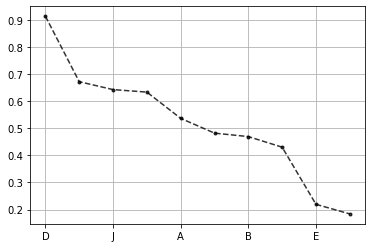

In [46]:
df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
df_n1 = data_norm(df,'value1','value2')
df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
<class 'pandas.core.arrays.categorical.Categorical'>
[0 0 0 1 0 0 2 1 3 2 2 1] <class 'numpy.ndarray'>
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]') <class 'pandas.core.indexes.interval.IntervalIndex'>
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64
[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]
['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']
    ages      label
0     20   (18, 25]
1    

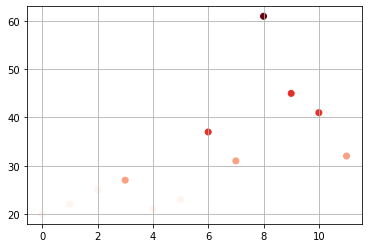

In [47]:
ages=[20,22,25,27,21,23,37,31,61,45,41,32]

bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats)
print(type(cats))

print(cats.codes, type(cats.codes)) 
print(cats.categories, type(cats.categories))  
print(pd.value_counts(cats))  # 按照区间计数

print(pd.cut(ages,[18,26,36,61,100],right=False))

group_names=['Youth','YoungAdult','MiddleAged','Senior']
print(pd.cut(ages,bins,labels=group_names))

df = pd.DataFrame({'ages':ages})
group_names=['Youth','YoungAdult','MiddleAged','Senior']
s = pd.cut(df['ages'],bins)  # 也可以 pd.cut(df['ages'],5),将数据等分为5份
df['label'] = s
cut_counts = s.value_counts(sort=False) 
print(df)
print(cut_counts)

plt.scatter(df.index,df['ages'],cmap = 'Reds',c = cats.codes)
plt.grid()

0                  (-0.051, 0.667]
1                  (-0.051, 0.667]
2                 (-0.697, -0.051]
3                  (-0.051, 0.667]
4    (-3.7689999999999997, -0.697]
dtype: category
Categories (4, interval[float64]): [(-3.7689999999999997, -0.697] < (-0.697, -0.051] < (-0.051, 0.667] < (0.667, 4.079]]
(0.667, 4.079]                   250
(-0.051, 0.667]                  250
(-0.697, -0.051]                 250
(-3.7689999999999997, -0.697]    250
dtype: int64
------


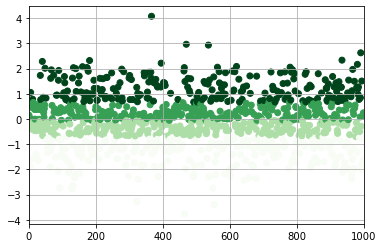

In [48]:
data = np.random.randn(1000)
s = pd.Series(data)
cats = pd.qcut(s,4)  # 按四分位数进行切割
print(cats.head())
print(pd.value_counts(cats))
print('------')

plt.scatter(s.index,s,cmap = 'Greens',c = pd.qcut(data,4).codes)
plt.xlim([0,1000])
plt.grid()

In [50]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

In [51]:
data=pd.DataFrame(np.random.randint(50,100,size=(5, 10)))
data.columns=["特征1","特征2","特征3","特征4","特征5","特征6","特征7","特征8","特征9","特征10"]
data.index=['对象1','对象2','对象3','对象4','对象5']

In [52]:
data.head(3)

,特征1,特征2,特征3,特征4,特征5,特征6,特征7,特征8,特征9,特征10
对象1,85,92,99,98,86,68,88,73,86,55
对象2,86,92,96,57,80,81,66,91,95,99
对象3,99,94,97,82,82,75,55,57,62,99


In [54]:
data=(data-data.mean())/data.std() # 0均值规范化
data

,特征1,特征2,特征3,特征4,特征5,特征6,特征7,特征8,特征9,特征10
对象1,-0.054345,-0.407556,0.574960,1.283019,1.106797,-0.550812,0.959989,-0.035806,0.353258,-0.765544
对象2,0.013586,-0.407556,0.402472,-1.129998,0.158114,0.604116,-0.429469,1.038367,0.920994,1.085222
对象3,0.896694,0.174667,0.459968,0.341354,0.474342,0.071073,-1.124198,-0.990626,-1.160704,1.085222
对象4,0.760832,1.630223,-1.782375,0.400208,-0.158114,1.226001,1.149461,0.978690,-0.971459,-0.513167
对象5,-1.616767,-0.989778,0.344976,-0.894582,-1.581139,-1.350378,-0.555783,-0.990626,0.857912,-0.891733


In [55]:
C=data.corr()
C

,特征1,特征2,特征3,特征4,特征5,特征6,特征7,特征8,特征9,特征10
特征1,1.000000,0.753450,-0.381790,0.492958,0.700844,0.804475,0.176763,0.368499,-0.793411,0.520188
特征2,0.753450,1.000000,-0.891284,0.383781,0.218636,0.831480,0.502851,0.498589,-0.788726,0.026327
特征3,-0.381790,-0.891284,1.000000,-0.145506,0.163636,-0.672976,-0.594623,-0.536116,0.516840,0.275703
特征4,0.492958,0.383781,-0.145506,1.000000,0.688618,0.083397,0.572613,-0.069893,-0.534988,-0.311427
特征5,0.700844,0.218636,0.163636,0.688618,1.000000,0.365220,0.289595,0.266557,-0.304210,0.332536
特征6,0.804475,0.831480,-0.672976,0.083397,0.365220,1.000000,0.322909,0.778551,-0.517550,0.432358
特征7,0.176763,0.502851,-0.594623,0.572613,0.289595,0.322909,1.000000,0.577220,-0.086255,-0.628811
特征8,0.368499,0.498589,-0.536116,-0.069893,0.266557,0.778551,0.577220,1.000000,0.073219,0.115091
特征9,-0.793411,-0.788726,0.516840,-0.534988,-0.304210,-0.517550,-0.086255,0.073219,1.000000,-0.199270
特征10,0.520188,0.026327,0.275703,-0.311427,0.332536,0.432358,-0.628811,0.115091,-0.199270,1.000000


In [56]:
import numpy.linalg as nlg 

In [58]:
eig_value,eig_vector=nlg.eig(C) #计算特征值和特征向量

eig=pd.DataFrame() #利用变量名和特征值建立一个数据框

eig['names']=data.columns#列名

eig['eig_value']=eig_value#特征值
eig

,names,eig_value
0,特征1,4.755655e+00+0.000000e+00j
1,特征2,2.182921e+00+0.000000e+00j
2,特征3,1.788219e+00+0.000000e+00j
3,特征4,1.273205e+00+0.000000e+00j
4,特征5,2.351375e-16+0.000000e+00j
5,特征6,-4.390486e-16+0.000000e+00j
6,特征7,-2.076362e-16+7.369724e-17j
7,特征8,-2.076362e-16-7.369724e-17j
8,特征9,7.128940e-17+0.000000e+00j
9,特征10,-5.162576e-17+0.000000e+00j


In [59]:
from math import sqrt

for k in range(1,11): #确定公共因子个数
    if eig['eig_value'][:k].sum()/eig['eig_value'].sum()>=0.8: #如果解释度达到80%, 结束循环
        print(k)
        break

3


In [60]:
eig['eig_value'][:3].sum()/eig['eig_value'].sum()

(0.8726794587917397+0j)

In [62]:
col0=list(sqrt(eig_value[0])*eig_vector[:,0]) 
col1=list(sqrt(eig_value[1])*eig_vector[:,1]) 
col2=list(sqrt(eig_value[2])*eig_vector[:,2]) 
A=pd.DataFrame([col0,col1,col2]).T 
A.columns=['factor1','factor2','factor3']
A

,factor1,factor2,factor3
0,-0.878411+0.000000j,-0.461834+0.000000j,-0.121766+0.000000j
1,-0.939537+0.000000j,0.127979+0.000000j,0.143381+0.000000j
2,0.733151+0.000000j,-0.483965+0.000000j,-0.360675+0.000000j
3,-0.523098+0.000000j,0.147957+0.000000j,-0.839035+0.000000j
4,-0.526364+0.000000j,-0.390715+0.000000j,-0.547638+0.000000j
5,-0.880933+0.000000j,-0.181587+0.000000j,0.420926+0.000000j
6,-0.564998+0.000000j,0.730723+0.000000j,-0.192551+0.000000j
7,-0.602744+0.000000j,0.193377+0.000000j,0.508699+0.000000j
8,0.731070+0.000000j,0.242811+0.000000j,0.240357+0.000000j
9,-0.141739+0.000000j,-0.938721+0.000000j,0.296748+0.000000j


In [64]:
#建模
h=np.zeros(10) 
D=np.mat(np.eye(10))
A=np.mat(A)
for i in range(10):
    a=A[i,:]*A[i,:].T 
    h[i]=a[0,0]  
    D[i,i]=1-a[0,0] 

In [65]:
from numpy import eye, asarray, dot, sum, diag #导入eye,asarray,dot,sum,diag 函数
from numpy.linalg import svd #导入奇异值分解函数

In [67]:
def varimax(Phi, gamma = 1.0, q =10, tol = 1e-6): #定义方差最大旋转函数
    p,k = Phi.shape #给出矩阵Phi的总行数，总列数
    R = eye(k) #给定一个k*k的单位矩阵
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)#矩阵乘法

        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda)))))) #奇异值分解svd

        R = dot(u,vh)#构造正交矩阵R

        d = sum(s)#奇异值求和

    if d_old!=0 and d/d_old:
        return dot(Phi, R)#返回旋转矩阵Phi*R

rotation_mat=varimax(A)#调用方差最大旋转函数
rotation_mat=pd.DataFrame(rotation_mat)#数据框化
rotation_mat

,0,1,2
0,-0.588743+0.000000j,-0.383689+0.000000j,-0.711258+0.000000j
1,-0.874436+0.000000j,0.097497+0.000000j,-0.381472+0.000000j
2,0.876589+0.000000j,-0.365253+0.000000j,0.000893+0.000000j
3,-0.002558+0.000000j,0.409140+0.000000j,-0.912195+0.000000j
4,-0.078666+0.000000j,-0.192757+0.000000j,-0.828421+0.000000j
5,-0.927606+0.000000j,-0.283441+0.000000j,-0.213079+0.000000j
6,-0.477200+0.000000j,0.766239+0.000000j,-0.274615+0.000000j
7,-0.803381+0.000000j,0.040600+0.000000j,0.111354+0.000000j
8,0.436978+0.000000j,0.141986+0.000000j,0.663387+0.000000j
9,-0.131163+0.000000j,-0.981304+0.000000j,-0.095841+0.000000j


In [68]:
data=np.mat(data) #矩阵化处理
factor_score=(data).dot(A) #计算因子得分
factor_score=pd.DataFrame(factor_score) #数据框化
factor_score.columns=['因子A','因子B','因子C'] #对因子变量进行命名
factor_score

,因子A,因子B,因子C
0,-0.070359+0.000000j,1.051060+0.000000j,-2.518992+0.000000j
1,0.778013+0.000000j,-1.500005+0.000000j,2.064872+0.000000j
2,-0.875506+0.000000j,-3.075706+0.000000j,-1.010711+0.000000j
3,-6.589685+0.000000j,1.893261+0.000000j,0.941564+0.000000j
4,6.757536+0.000000j,1.631390+0.000000j,0.523267+0.000000j
